Lets brush up out knlwdlege of pytorch, autograd to create a Linear model for a toy dataset.

In [35]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], [8.9],
                  [5.2], [8.59], [2.1], [8.0], [10.0], [4.5], [6.0], [4.0]], dtype= np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], [2.6],
                  [1.96], [3.53], [1.76], [3.2], [3.5], [1.6], [2.5], [2.2]], dtype= np.float32)

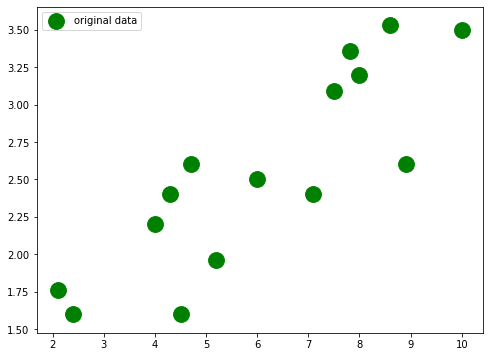

In [5]:
plt.figure(figsize=(8,6))

plt.scatter(x_train, y_train, label='original data', s =250, c='g')

plt.legend()

In [6]:
# firs step is to convert the numpy arrats to tensors

In [7]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [8]:
print(x_train.requires_grad)
print(y_train.requires_grad)

False
False


In [9]:
input_size =1
hidden_size =1 
output_size =1


In [12]:
w1 = torch.rand(input_size, hidden_size, requires_grad = True)
print(w1.shape)

torch.Size([1, 1])


In [13]:
w2 = torch.rand(hidden_size, output_size, requires_grad = True)
print(w2.shape)

torch.Size([1, 1])


In [14]:
learning_rate = 1e-6

In [27]:
for iter in range(0,10000):
    y_pred =x_train.mm(w1).mm(w2)
    loss = (y_pred - y_train).pow(2).sum()
    
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()
        

0 27.209922790527344
50 26.01861572265625
100 24.862417221069336
150 23.742416381835938
200 22.659528732299805
250 21.614477157592773
300 20.607810974121094
350 19.639934539794922
400 18.711009979248047
450 17.821107864379883
500 16.9700927734375
550 16.1577205657959
600 15.383567810058594
650 14.647111892700195
700 13.947680473327637
750 13.284527778625488
800 12.6567964553833
850 12.063515663146973
900 11.503691673278809
950 10.976232528686523
1000 10.480008125305176
1050 10.013853073120117
1100 9.576567649841309
1150 9.16693115234375
1200 8.783708572387695
1250 8.425663948059082
1300 8.091583251953125
1350 7.780232906341553
1400 7.490419864654541
1450 7.220968723297119
1500 6.970729827880859
1550 6.738593101501465
1600 6.523473739624023
1650 6.32432222366333
1700 6.140137195587158
1750 5.969959259033203
1800 5.812866687774658
1850 5.667984962463379
1900 5.534460544586182
1950 5.411525249481201
2000 5.29842472076416
2050 5.19445276260376
2100 5.098936080932617
2150 5.01125431060791
2

In [28]:
w1

tensor([[0.6323]], requires_grad=True)

In [29]:
w2

tensor([[0.6272]], requires_grad=True)

In [30]:
x_train

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [31]:
predicted_in_tensor = x_train.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8640],
        [0.9519],
        [2.9745],
        [2.8159],
        [1.7054],
        [3.0999],
        [3.5298],
        [2.0623],
        [3.4068],
        [0.8329],
        [3.1728],
        [3.9661],
        [1.7847],
        [2.3796],
        [1.5864]], grad_fn=<MmBackward>)

In [32]:
predicted = predicted_in_tensor.detach().numpy()

In [33]:
predicted

array([[1.8640462],
       [0.9518534],
       [2.974542 ],
       [2.8158996],
       [1.7054042],
       [3.0998693],
       [3.5297894],
       [2.062349 ],
       [3.406842 ],
       [0.8328717],
       [3.1728446],
       [3.966056 ],
       [1.7847252],
       [2.3796334],
       [1.5864223]], dtype=float32)

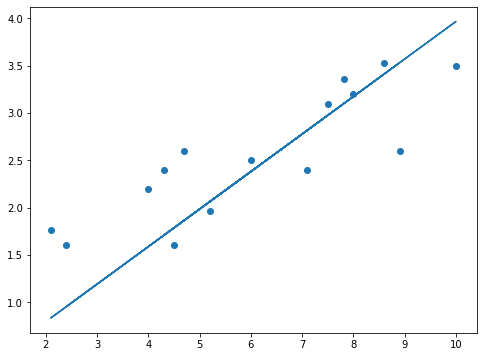

In [34]:
plt.figure(figsize=(8,6))

plt.scatter(x_train, y_train, label ='Original data')
plt.plot(x_train, predicted, label = 'fittted line')